In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [14]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [15]:
X_train_full.shape, y_train_full.shape, X_test_full.shape, y_test_full.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

[6]


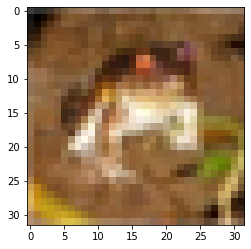

In [16]:
print(y_train_full[0])
plt.imshow(X_train_full[0])
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1)

In [18]:
X_train.shape, X_valid.shape

((45000, 32, 32, 3), (5000, 32, 32, 3))

In [23]:
model = keras.models.Sequential()

In [24]:
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for i in range(20):
    model.add(keras.layers.Dense(100, 
                                kernel_initializer=keras.initializers.he_normal, 
                                activation=keras.activations.elu))
model.add(keras.layers.Dense(10, 
                            activation="softmax",
                            kernel_initializer=keras.initializers.glorot_uniform))

In [26]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
             optimizer=keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), 
             metrics=keras.metrics.sparse_categorical_accuracy)

In [27]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
         callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
1407/1407 [==============================] - 14s 8ms/step - loss: 3.5407 - sparse_categorical_accuracy: 0.2034 - val_loss: 2.2762 - val_sparse_categorical_accuracy: 0.1616
Epoch 2/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.9404 - sparse_categorical_accuracy: 0.2836 - val_loss: 1.9853 - val_sparse_categorical_accuracy: 0.2964
Epoch 3/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.8879 - sparse_categorical_accuracy: 0.3091 - val_loss: 1.9391 - val_sparse_categorical_accuracy: 0.2802
Epoch 4/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.8464 - sparse_categorical_accuracy: 0.3212 - val_loss: 2.0713 - val_sparse_categorical_accuracy: 0.2476
Epoch 5/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.8243 - sparse_categorical_accuracy: 0.3310 - val_loss: 1.8602 - val_sparse_categorical_accuracy: 0.3114
Epoch 6/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.

In [32]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

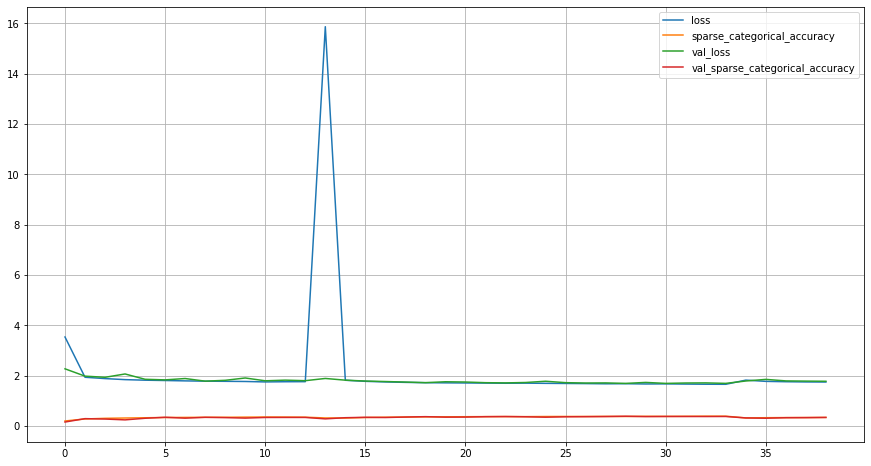

In [33]:
pd.DataFrame(history.history).plot(figsize=(15, 8))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42) 

In [35]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for i in range(20):
    model.add(keras.layers.Dense(100, 
                                kernel_initializer=keras.initializers.he_normal, 
                                activation=keras.activations.elu))
    model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, 
                            activation="softmax",
                            kernel_initializer=keras.initializers.glorot_uniform))

In [36]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
             optimizer=keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), 
             metrics=keras.metrics.sparse_categorical_accuracy)

In [37]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
         callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
1407/1407 [==============================] - 27s 13ms/step - loss: 1.9009 - sparse_categorical_accuracy: 0.3157 - val_loss: 1.7230 - val_sparse_categorical_accuracy: 0.3936
Epoch 2/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.7126 - sparse_categorical_accuracy: 0.3878 - val_loss: 1.6285 - val_sparse_categorical_accuracy: 0.4218
Epoch 3/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.6393 - sparse_categorical_accuracy: 0.4152 - val_loss: 1.5832 - val_sparse_categorical_accuracy: 0.4398
Epoch 4/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.5893 - sparse_categorical_accuracy: 0.4377 - val_loss: 1.4990 - val_sparse_categorical_accuracy: 0.4602
Epoch 5/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.5453 - sparse_categorical_accuracy: 0.4503 - val_loss: 1.5338 - val_sparse_categorical_accuracy: 0.4588
Epoch 6/100
1407/1407 [==============================] - 19s 13ms/step - lo

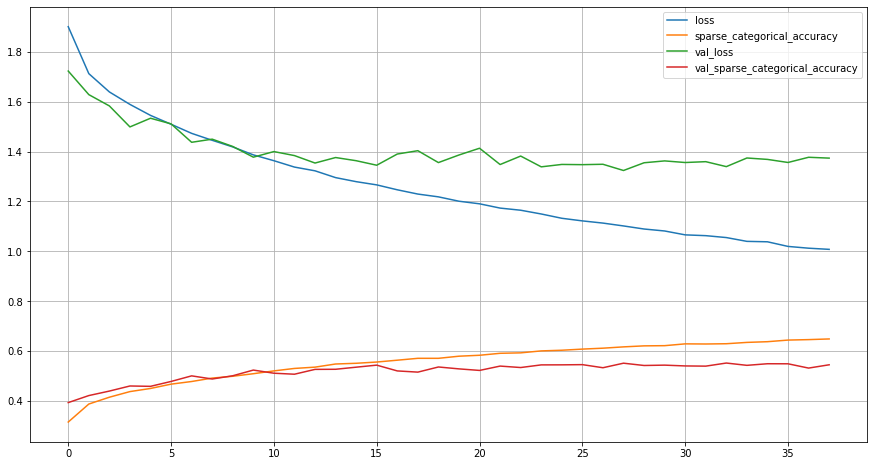

In [39]:
pd.DataFrame(history.history).plot(figsize=(15, 8))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.show()

##### Observations

Convergence to optimum value is much more effective compare to precious result but the time complexity is high, and oveall accuracy is also improved.

### Implementing 